### Data and Package Import

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trips_hourly_engineered = pd.read_pickle('../00_data/trips_hourly_engineered.pkl')

### Weekday

In [4]:
#create column for total of starting and ongoing trips per hour
trips_hourly_engineered["ongoing_trips_total"]= trips_hourly_engineered["starting_trips"]+ trips_hourly_engineered["starting_trips"]
trips_hourly_engineered

,starting_trips,ongoing_trips_prev,in_service_bikes_rolling,available_bikes,max_temp,min_temp,precip,hour,day_of_week,month,day_of_year,week,is_weekday,is_holiday,ongoing_trips_total
index,,,,,,,,,,,,,,,
2019-01-01 01:00:00,8.0,2.0,873.0,871.0,15.6,15.6,0.0,1,1,1,1,1,True,True,16.0
2019-01-01 02:00:00,11.0,4.0,873.0,869.0,15.0,15.0,0.0,2,1,1,1,1,True,True,22.0
2019-01-01 03:00:00,2.0,3.0,873.0,870.0,15.0,15.0,0.0,3,1,1,1,1,True,True,4.0
2019-01-01 06:00:00,2.0,1.0,873.0,872.0,12.2,12.2,0.0,6,1,1,1,1,True,True,4.0
2019-01-01 07:00:00,3.0,1.0,873.0,872.0,12.8,12.8,0.0,7,1,1,1,1,True,True,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,28.0,12.0,906.0,894.0,20.0,20.0,0.0,19,1,12,365,1,True,True,56.0
2019-12-31 20:00:00,40.0,8.0,905.0,897.0,20.6,20.6,0.0,20,1,12,365,1,True,True,80.0
2019-12-31 21:00:00,23.0,15.0,905.0,890.0,21.1,21.1,0.0,21,1,12,365,1,True,True,46.0


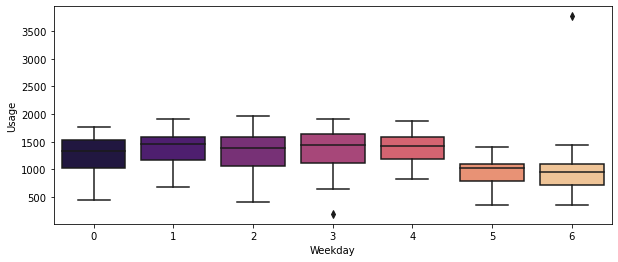

In [17]:
#group by weekday and plot
trips_hourly_engineered_weekday = trips_hourly_engineered.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_engineered_weekday = pd.DataFrame(trips_hourly_engineered_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_weekday.index.get_level_values(1), y=trips_hourly_engineered_weekday["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Time")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
plt.show()

### Hour

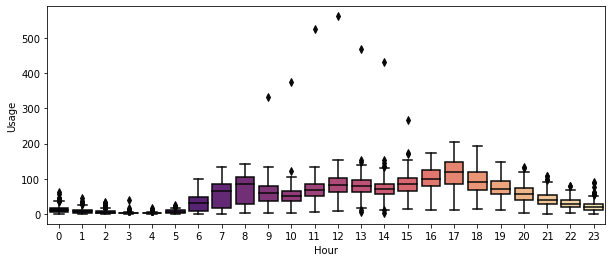

In [13]:
#group by hour and plot
trips_hourly_engineered_hour = trips_hourly_engineered.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_engineered_hour = pd.DataFrame(trips_hourly_engineered_hour)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_hour.index.get_level_values(1), y=trips_hourly_engineered_hour["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Time")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
plt.show()

### Month

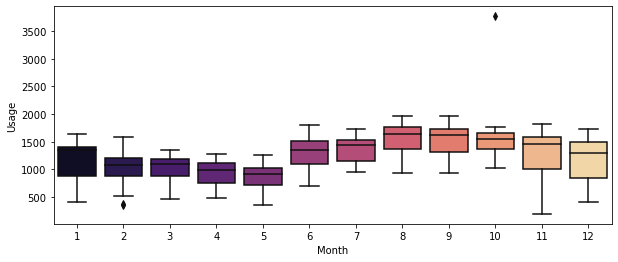

In [20]:
#group by month and plot
trips_hourly_engineered_month = trips_hourly_engineered.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_engineered_month = pd.DataFrame(trips_hourly_engineered_month)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_month.index.get_level_values(1), y=trips_hourly_engineered_month["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("", fontsize=18, fontname="Arial")
ax.set_xlabel("Time")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
plt.show()

,,ongoing_trips_total
day_of_year,month,
1,1,886.0
2,1,1200.0
3,1,1352.0
4,1,1428.0
5,1,510.0
6,1,676.0
7,1,866.0
8,1,1390.0
9,1,1456.0
